# Applying linear regression equations on one-dimensional raster data

## Florian Beyer
### 2020-09-23

#### sources:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import pandas as pd
import seaborn as sns
from osgeo import ogr, gdal
import geopandas as gpd

from sklearn.metrics import r2_score

## BALJE

In [2]:
NHN = 'R:/OwnCloud/DissBeyer/tibass/bal/results/sub_2020_08_24_BAL_PLSR_NHN.tif'
PHL = 'R:/OwnCloud/DissBeyer/tibass/bal/results/sub_2020_08_24_BAL_PLSR_PHL.tif'
PWG = 'R:/OwnCloud/DissBeyer/tibass/bal/results/sub_2020_08_24_BAL_PLSR_PWG.tif'

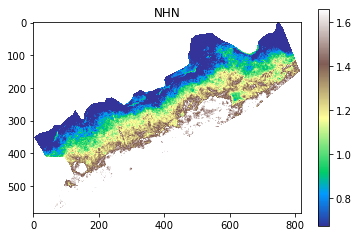

In [3]:
with rasterio.open(NHN) as src:
    nhn = src.read(1)
    nhn = nhn.astype('float32')
    nhn[nhn == 0] = np.nan
    
    profile = src.profile.copy()

plt.imshow(nhn, cmap='terrain', vmin=np.nanmean(nhn)-np.nanstd(nhn), vmax=np.nanmean(nhn)+np.nanstd(nhn))
plt.title('NHN')
plt.colorbar()
plt.show()

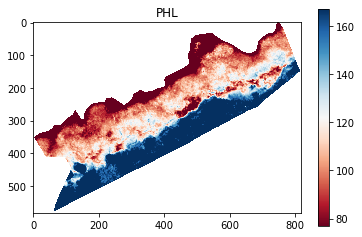

In [4]:
with rasterio.open(PHL) as src:
    phl = src.read(1)
    phl = phl.astype('float32')
    phl[phl == 0] = np.nan

plt.imshow(phl, cmap='RdBu', vmin=np.nanmean(phl)-np.nanstd(phl), vmax=np.nanmean(phl)+np.nanstd(phl))
plt.title('PHL')
plt.colorbar()
plt.show()

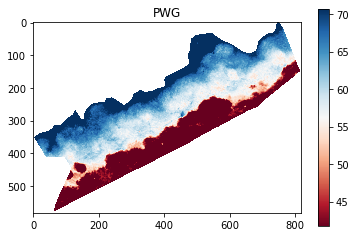

In [5]:
with rasterio.open(PWG) as src:
    pwg = src.read(1)
    pwg = pwg.astype('float32')
    pwg[pwg == 0] = np.nan

plt.imshow(pwg, cmap='RdBu', vmin=np.nanmean(pwg)-np.nanstd(pwg), vmax=np.nanmean(pwg)+np.nanstd(pwg), )
plt.title('PWG')
plt.colorbar()
plt.show()

### Regressionsgeraden

- PDML:  y = -1.97x + 7.58   --> NHN
- PTM :  y = 0.05x -2.24     --> PHL
- PTM :  y = -0.13x + 10.55  --> PWG
- FTM :  y = 2.02x – 97.48   --> PHL
- FTM :  y = -5.37x + 442.69 --> PWG
- PFM :  y = 0.06x + 0.09    --> PHL
- FFM :  y = 2.91x -42.28    --> PHL

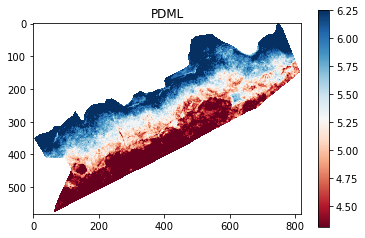

In [6]:
# PDML

PDML = -1.97 * nhn + 7.58 

plt.imshow(PDML, cmap='RdBu', vmin=np.nanmean(PDML)-np.nanstd(PDML), vmax=np.nanmean(PDML)+np.nanstd(PDML))
plt.title('PDML')
plt.colorbar()
plt.show()

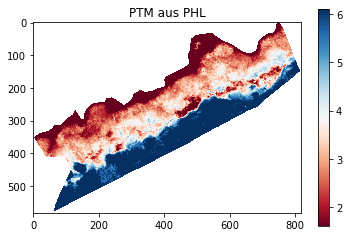

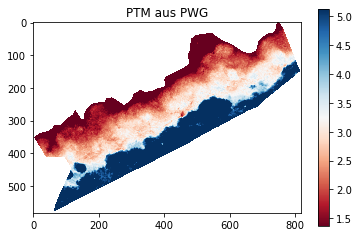

In [7]:
# PTM
PTM_PHL = 0.05 * phl - 2.24
PTM_PWG = -0.13 * pwg + 10.55

plt.imshow(PTM_PHL, cmap='RdBu', vmin=np.nanmean(PTM_PHL)-np.nanstd(PTM_PHL), vmax=np.nanmean(PTM_PHL)+np.nanstd(PTM_PHL))
plt.title('PTM aus PHL')
plt.colorbar()
plt.show()

plt.imshow(PTM_PWG, cmap='RdBu', vmin=np.nanmean(PTM_PWG)-np.nanstd(PTM_PWG), vmax=np.nanmean(PTM_PWG)+np.nanstd(PTM_PWG))
plt.title('PTM aus PWG')
plt.colorbar()
plt.show()



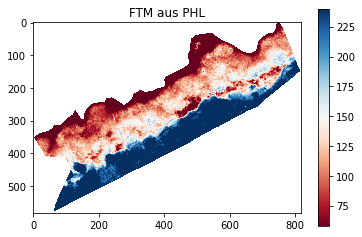

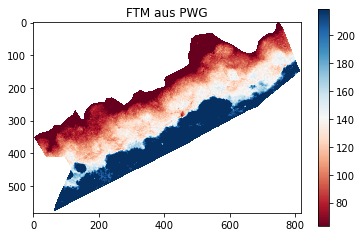

In [8]:
# FTM 
FTM_PHL = 2.02 * phl - 97.4
FTM_PWG = -5.37 * pwg + 442.69

plt.imshow(FTM_PHL, cmap='RdBu', vmin=np.nanmean(FTM_PHL)-np.nanstd(FTM_PHL), vmax=np.nanmean(FTM_PHL)+np.nanstd(FTM_PHL))
plt.title('FTM aus PHL')
plt.colorbar()
plt.show()

plt.imshow(FTM_PWG, cmap='RdBu', vmin=np.nanmean(FTM_PWG)-np.nanstd(FTM_PWG), vmax=np.nanmean(FTM_PWG)+np.nanstd(FTM_PWG))
plt.title('FTM aus PWG')
plt.colorbar()
plt.show()


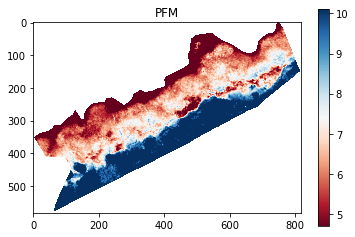

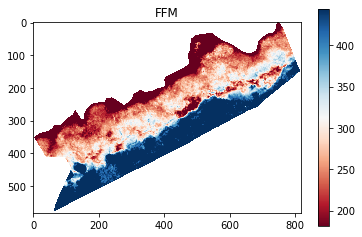

In [9]:
# PFM
PFM = 0.06 * phl + 0.09
FFM = 2.91 * phl - 42.28

plt.imshow(PFM, cmap='RdBu', vmin=np.nanmean(PFM)-np.nanstd(PFM), vmax=np.nanmean(PFM)+np.nanstd(PFM))
plt.title('PFM')
plt.colorbar()
plt.show()

plt.imshow(FFM, cmap='RdBu', vmin=np.nanmean(FFM)-np.nanstd(FFM), vmax=np.nanmean(FFM)+np.nanstd(FFM))
plt.title('FFM')
plt.colorbar()
plt.show()

In [10]:
filename = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'

with rasterio.open(filename+ 'BAL_PDML.tif', 'w', **profile) as dst:
    dst.write_band(1,PDML)
    
with rasterio.open(filename+ 'BAL_PTM_PHL.tif', 'w', **profile) as dst:
    dst.write_band(1,PTM_PHL)

with rasterio.open(filename+ 'BAL_PTM_PWG.tif', 'w', **profile) as dst:
    dst.write_band(1,PTM_PWG)

with rasterio.open(filename+ 'BAL_FTM_PHL.tif', 'w', **profile) as dst:
    dst.write_band(1,FTM_PHL)

with rasterio.open(filename+ 'BAL_FTM_PWG.tif', 'w', **profile) as dst:
    dst.write_band(1,FTM_PWG)

with rasterio.open(filename+ 'BAL_PFM.tif', 'w', **profile) as dst:
    dst.write_band(1,PFM)

with rasterio.open(filename+ 'BAL_FFM.tif', 'w', **profile) as dst:
    dst.write_band(1,FFM)



In [6]:
# data input

BAL = 'R:/OwnCloud/DissBeyer/tibass/bal/feld/balje_Messdaten.shp'

settings_sns = {'axes.facecolor': 'white',
                'axes.edgecolor': '0',
                'axes.grid': True,
                'axes.axisbelow': True,
                'axes.labelcolor': '.15',
                'figure.facecolor': 'white',
                'grid.color': '.8',
                'grid.linestyle': '--',
                'text.color': '0',
                'xtick.color': '0',
                'ytick.color': '0',
                'xtick.direction': 'in',
                'ytick.direction': 'in',
                'lines.solid_capstyle': 'round',
                'patch.edgecolor': 'w', 
                'patch.force_edgecolor': True,
                'image.cmap': 'Greys',
                'font.family': ['serif'],
                'font.sans-serif': ['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
                'xtick.bottom': True,
                'xtick.top': True,
                'ytick.left': True,
                'ytick.right': True,
                'axes.spines.left': True,
                'axes.spines.bottom': True,
                'axes.spines.right': True,
                'axes.spines.top': True}

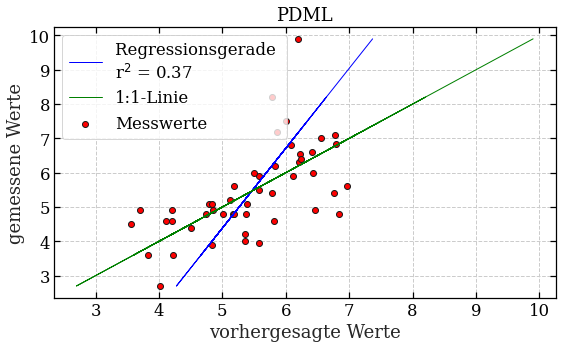

In [9]:
name = 'PDML'

param = 'PDML'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


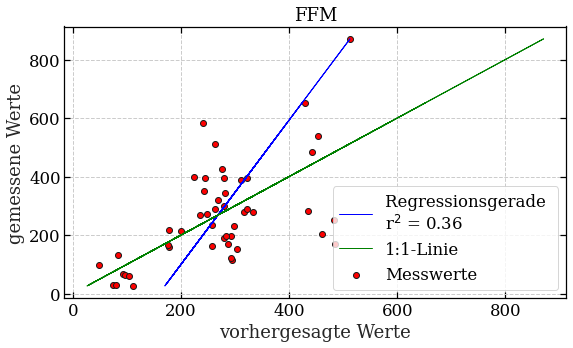

In [10]:
name = 'FFM'

param = 'FFM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


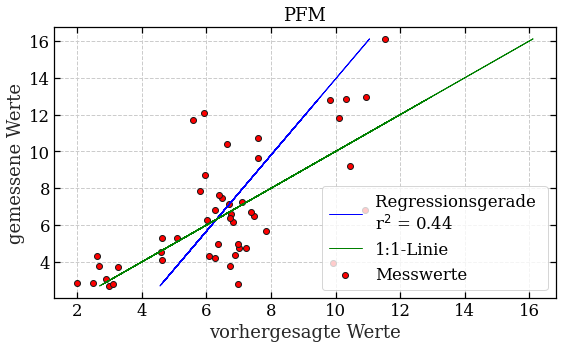

In [11]:
name = 'PFM'

param = 'PFM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


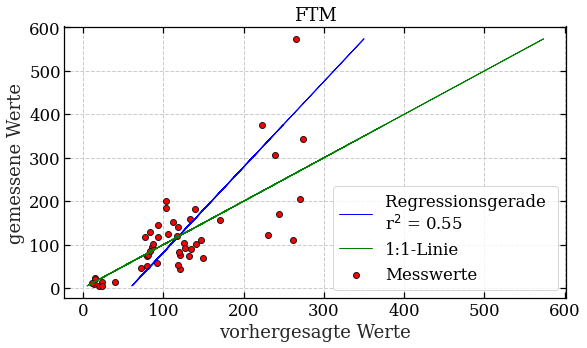

In [12]:
name = 'FTM_PWG'

param = 'FTM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


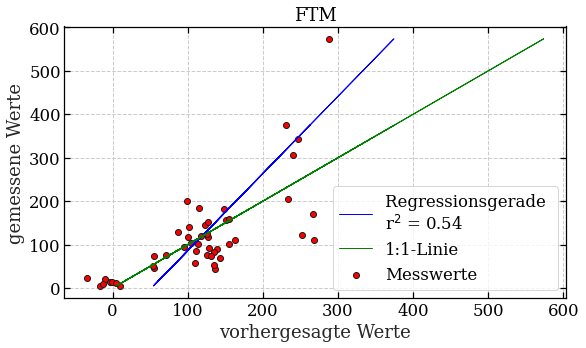

In [13]:
name = 'FTM_PHL'

param = 'FTM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


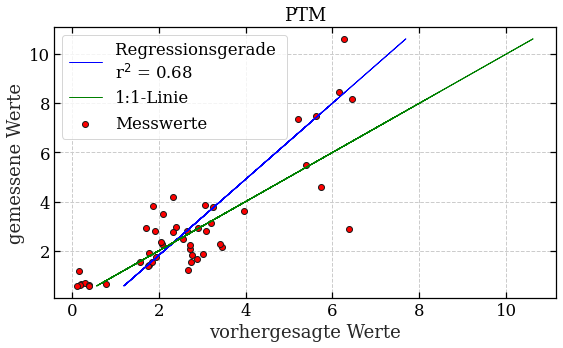

In [14]:
name = 'PTM_PWG'

param = 'PTM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


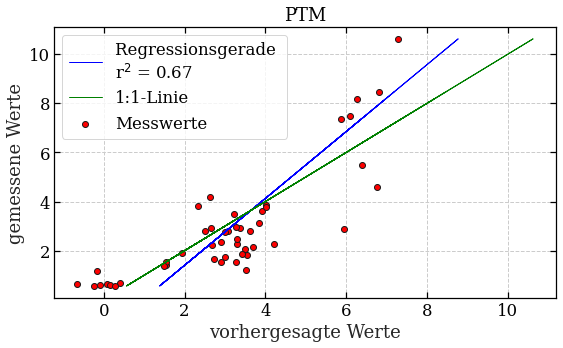

In [15]:
name = 'PTM_PHL'

param = 'PTM'

image = 'R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/BAL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(BAL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/bal/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


# Hollerwettern

In [16]:
NHN = 'R:/OwnCloud/DissBeyer/tibass/holl/results/HOL_NHN_sub.tif'
PWG = 'R:/OwnCloud/DissBeyer/tibass/holl/results/HOL_PWG_sub.tif'

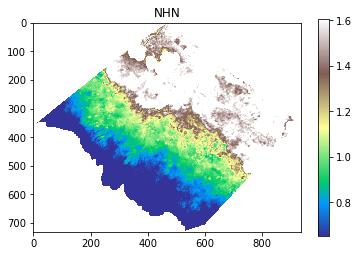

In [17]:
with rasterio.open(NHN) as src:
    nhn = src.read(1)
    nhn = nhn.astype('float32')
    nhn[nhn == 0] = np.nan
    
    profile = src.profile.copy()

plt.imshow(nhn, cmap='terrain', vmin=np.nanmean(nhn)-np.nanstd(nhn), vmax=np.nanmean(nhn)+np.nanstd(nhn))
plt.title('NHN')
plt.colorbar()
plt.show()

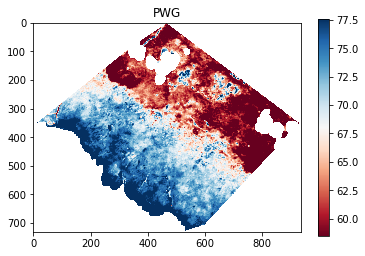

In [18]:
with rasterio.open(PWG) as src:
    pwg = src.read(1)
    pwg = pwg.astype('float32')
    pwg[pwg == 0] = np.nan

plt.imshow(pwg, cmap='RdBu', vmin=np.nanmean(pwg)-np.nanstd(pwg), vmax=np.nanmean(pwg)+np.nanstd(pwg), )
plt.title('PWG')
plt.colorbar()
plt.show()

### Regressionsgeraden

- PDML:  y = -3.23x + 9.90   --> NHN
- PTM :  y = -0.14x + 14.04  --> PWG

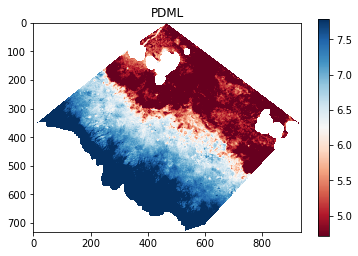

In [24]:
# PDML

PDML = -3.23 * nhn + 9.90

plt.imshow(PDML, cmap='RdBu', vmin=np.nanmean(PDML)-np.nanstd(PDML), vmax=np.nanmean(PDML)+np.nanstd(PDML))
plt.title('PDML')
plt.colorbar()
plt.show()

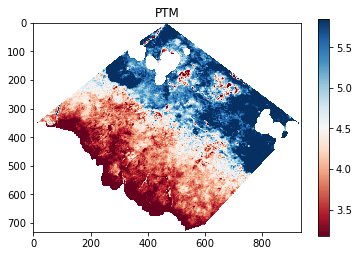

In [25]:
# PTM

PTM = -0.14 * pwg + 14.04

plt.imshow(PTM, cmap='RdBu', vmin=np.nanmean(PTM)-np.nanstd(PTM), vmax=np.nanmean(PTM)+np.nanstd(PTM))
plt.title('PTM')
plt.colorbar()
plt.show()

In [26]:
filename = 'R:/OwnCloud/DissBeyer/tibass/holl/results/lin_Regr_maps/'

with rasterio.open(filename+ 'HOL_PDML.tif', 'w', **profile) as dst:
    dst.write_band(1,PDML)
with rasterio.open(filename+ 'HOL_PTM.tif', 'w', **profile) as dst:
    dst.write_band(1,PTM)


## Statistik

In [19]:
# data input

HOL = 'R:/OwnCloud/DissBeyer/tibass/holl/vector/2020_08_13_Hollerwettern_feld_V2.shp'

settings_sns = {'axes.facecolor': 'white',
                'axes.edgecolor': '0',
                'axes.grid': True,
                'axes.axisbelow': True,
                'axes.labelcolor': '.15',
                'figure.facecolor': 'white',
                'grid.color': '.8',
                'grid.linestyle': '--',
                'text.color': '0',
                'xtick.color': '0',
                'ytick.color': '0',
                'xtick.direction': 'in',
                'ytick.direction': 'in',
                'lines.solid_capstyle': 'round',
                'patch.edgecolor': 'w', 
                'patch.force_edgecolor': True,
                'image.cmap': 'Greys',
                'font.family': ['serif'],
                'font.sans-serif': ['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
                'xtick.bottom': True,
                'xtick.top': True,
                'ytick.left': True,
                'ytick.right': True,
                'axes.spines.left': True,
                'axes.spines.bottom': True,
                'axes.spines.right': True,
                'axes.spines.top': True}

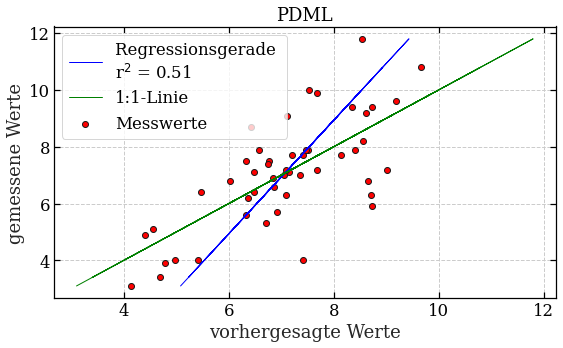

In [20]:
name = 'PDML'

param = 'PDML'

image = 'R:/OwnCloud/DissBeyer/tibass/holl/results/lin_Regr_maps/HOL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(HOL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/holl/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()


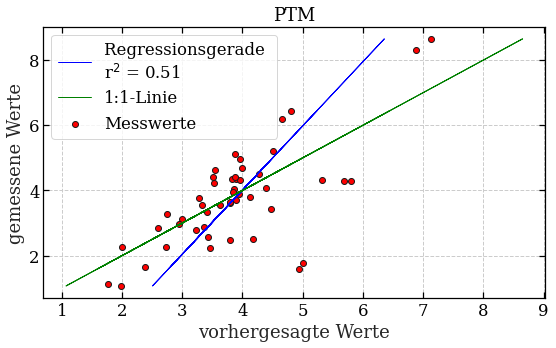

In [21]:
name = 'PTM'

param = 'PTM'

image = 'R:/OwnCloud/DissBeyer/tibass/holl/results/lin_Regr_maps/HOL_' + name + '.tif'

# Read points from shapefile
pts = gpd.read_file(HOL)

pts['lon'] = pts.geometry.apply(lambda p: p.x)
pts['lat'] = pts.geometry.apply(lambda p: p.y)

pts = pts[['lon', 'lat', param, 'geometry']]
pts.index = range(len(pts))

coords = [(x,y) for x, y in zip(pts.lon, pts.lat)]


# Open the raster and store metadata
src = rasterio.open(image)


# Sample the raster at every point location and store values in DataFrame
pts['pred'] = [x for x in src.sample(coords)]
pts['pred'] = pts.apply(lambda x: x['pred'][0], axis=1)
y = pts[str(param)]
y_c = pts.pred

score_c = r2_score(y, y_c)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    sns.set(rc=settings_sns, font_scale=1.5)
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title(param)
    plt.xlabel('vorhergesagte Werte')
    plt.ylabel('gemessene Werte')
    plt.legend(['Regressionsgerade \nr$^{2}$ = '+str(round(score_c,2)),'1:1-Linie','Messwerte'])
    plt.savefig('R:/OwnCloud/DissBeyer/tibass/holl/results/lin_Regr_maps/'+name+'_RegPlot.pdf', bbox_inches='tight')

    plt.show()
